# Домашнее задание "Математический анализ. Производная"

In [256]:
import numpy as np
import scipy.misc 
import matplotlib.pyplot as plt

In [257]:
from sympy import *

# Уровень 0

# Посчитайте значение первой и второй производной функции:

# $f(x) = x^5 + 4sin(2x) + cos(3x+3)$

# В точке x = 1.

In [258]:
# Найти производную функции
x = symbols('x')
expn = x**5 + 4 * sin(2 * x) + cos(3 * x + 3)
diff_expn = diff(expn, x)
diff_expn

5*x**4 - 3*sin(3*x + 3) + 8*cos(2*x)

In [259]:
# Производная в точке x = 1
ddx = lambdify(x, diff_expn)
print(ddx(1))

2.5090718022196383


In [260]:
print(diff_expn.evalf(subs={x: 1}))

2.50907180221964


In [261]:
# Второй способ: 
def func(x):
    return x**5 + 4 * sin(2 * x) + cos(3 * x + 3)

print(scipy.misc.derivative(func, 1, dx=1e-6, n=1))

# Или:
print(diff_expn.evalf(subs={x: 1}))

2.50907180188165
2.50907180221964


In [173]:
# Найти производную производной функции
diff_expn_2 = diff(expn, x, x)
diff_expn_2

20*x**3 - 16*sin(2*x) - 9*cos(3*(x + 1))

In [175]:
# Вторая производная в точке x = 1
ddx_2 = lambdify(x, diff_expn_2)
print(ddx_2(1))

-3.1902914090642014


In [185]:
# Второй способ: 
print(scipy.misc.derivative(func, 1, dx=1e-6, n=2))

# Или:
print(diff_expn_2.evalf(subs={x: 1}))

-3.19033688356285
-3.19029140906420


In [ ]:
# Не совсем понял зачем нужен метод evalf() и метод scipy.misc.derivative(), если
# это в целом, как я понял, равнозначные способы нахождения производных.
# Но тогда почему в рекомендованных материалах не было информации про методы 
# subs() и lambdify(), с помощью которых тоже можно найти производные.

# Уровень 1:
# Постройте график первой и второй производной функции:

# $f(x) = sin^5(2x+1)$

# На отрезке [-5; 5].

In [238]:
import pandas as pd

In [188]:
# Найти производную функции
z = symbols('z')
y = sin(2 * z + 1)**5
diff_y = diff(y, z)
diff_y

10*sin(2*z + 1)**4*cos(2*z + 1)

In [239]:
def new_func(z):
    return sin(2 * z + 1)**5

In [225]:
# Создать массив значений z на отрезке [-5; 5]
z_interval = [i for i in np.linspace(-5, 5, num=50, endpoint=True, retstep=False, dtype=None)]
z_interval_array = np.array(z_interval)

In [227]:
# Создать массив значений y на отрезке [-5; 5]
y_interval = []
for i in z_interval:
    a = scipy.misc.derivative(new_func, i, dx=1e-6, n=1)
    y_interval.append(a)
y_interval_array = np.array(y_interval)

In [230]:
df_diff = pd.DataFrame(
    {
        'z_values': z_interval_array,
        'y_values': y_interval_array
    })

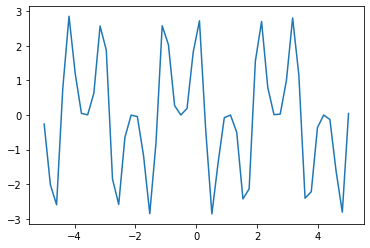

In [246]:
# График первой производной на отрезке [-5; 5]
plt.plot(z_interval_array, y_interval_array)

In [247]:
# Найти вторую производную функцию
diff_y_2 = diff(y, z, z)
diff_y_2

20*(-sin(2*z + 1)**2 + 4*cos(2*z + 1)**2)*sin(2*z + 1)**3

In [248]:
# Создать массив из значений второй производной
y_diff_values_2 = []
for i in z_interval:
    y_diff_value_2 = diff_y_2.evalf(subs={z: i})
    y_diff_values_2.append(y_diff_value_2)
y_diff_values_2_array = np.array(y_diff_values_2)

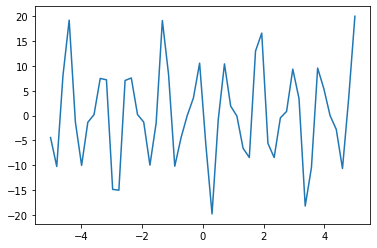

In [250]:
# График второй производной на отрезке [-5; 5]
plt.plot(z_interval_array, y_diff_values_2_array)